_WORKING I(N) PROGRESS_
# PREDICTING SURVIVORS - TITANIC

The "Titanic Project" is a common project among people who are starting in Machine Learning.
The goal of the project is to predict is a passenger survived.

The dataset was downloaded from Kaggle. https://www.kaggle.com/code/alexisbcook/titanic-tutorial
It has 418 rows and 12 columns.

In [279]:
# Necessary libraries

import numpy as np #linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # graph plots
import seaborn as sns # plots

%matplotlib inline


# basic styling for graphs
plt.style.use("seaborn-dark")
font = {"family": "Azeret Mono",
"weight": "bold",
"size": 14}

plt.rcParams.update({"font.family": font["family"], "font.weight": font["weight"], "font.size": font["size"]})

# loads data
data_train = pd.read_csv("data/00_titanic/train.csv")

# prepare the test set
data_test = pd.read_csv("data/00_titanic/test.csv")
data_test.info()

# take a glimpse at data
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


/var/folders/r9/ggpr596s74x4hr8c_sfdzc580000gn/T/ipykernel_32643/3671959236.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.1 Data Cleaning

Before I start playing, it's necessary to get my hands "dirty" by cleaning the data! 🧻


In [280]:
# get info about data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the data above, I can set my features (X arrays) and Y (labels). While the label will be logically column "Survived", for the choosen features are less obvious. Nevertheless some features are likely to bring little information in future predictions, such as the "name" the passenger, their ticket number, since they are unique.


I also see that there are some null values in Age, Cabin and Embarked, so I will proceed by filling them with a placeholder.

In [281]:
# check null values in data train
print(f"# of null values \n {data_train.isnull().sum()}")


# of null values 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [282]:
# check null values in test train
data_test.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Checking the number of empty values above, I decided to treat them as following:

- Age: I will use an estimator, the mean of ages.
- Cabin: Due to the large number of missing values, I will drop this feature.
- Embarked: Since we have only two rows with null values, it's unlikely these rows will make a large difference in the final model. So I will drop them.

In [283]:
# fill null values with placeholder
# another way to write the code below
# data_train.Age = data_train.Age.fillna(data_train.Age.median())

# first treat the train data
data_train["Age"] = data_train["Age"].fillna(data_train["Age"].median())
data_train.dropna(subset=["Embarked"], inplace=True)

# now treat the test data
data_test["Age"] = data_test["Age"].fillna(data_test["Age"].median())
data_test["Fare"] = data_test["Fare"].fillna(data_test["Fare"].median())
data_test["Embarked"] = data_test["Embarked"].fillna(data_test["Embarked"].mode())
# we don't need to treat 'Emabarked' since there are no null values


# now we treat the features we will use
# note that do not use 'Cabin' due to the large amount of null values
# Name will be removed after the data engineering step
# Survived will be removed once we start the models, when we set y_train and y_test
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Name"]

X_train = data_train[features]
X_test = data_test[features]

# Adds "survivor to list of features"
# this will be removed after the data visualisation

X_train["Survived"] = data_train["Survived"]
y_train = X_train["Survived"]




/var/folders/r9/ggpr596s74x4hr8c_sfdzc580000gn/T/ipykernel_32643/718571277.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Survived"] = data_train["Survived"]


In [284]:
# Just checking
X_train.info()

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
 7   Name      889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    f

In [285]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,32.096681,0.382452
std,0.834700,12.984932,1.103705,0.806761,49.697504,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


## 1.2 Feature engineering

Now I will explore if some features could be created based on the interpreation of the situation. I found this to be an exciting step! You need to combine creativity with logical reasoning, common sense, and the subject knowledge.

This is a fairly simple dataset. After exploring the rows, I decided to create two new columns. 

- Family Fame: We can potentially argue that the family name has an influence on the survival chance of a person. If a family was considered prestigious, they could be more likely to survive.
- Number of family members: This was suggested by ChatGPT. I don't have any issues in admiting AI Agents are my friends during working from home (among my cats 🐱 🐱 🐱)


In [286]:
import re # regular expressions

# family members
# Add new feature using .loc to avoid SettingWithCopyWarning
X_train.loc[:, "N_Family_Members"] = X_train["SibSp"] + X_train["Parch"]
X_test.loc[:, "N_Family_Members"] = X_test["SibSp"] + X_test["Parch"]


# family name
# the condition is treated with regex
# "the first words that appear up the comma, in "Name" "
def extract_family_name(name):
    match = re.match(r'^([^,]+)', name)
    if match:
        return match.group(1)
    else:
        return "Uknown"

# extract the family name and create a new column
X_train["Family_Name"] = X_train["Name"].apply(extract_family_name)
X_test["Family_Name"] = X_test["Name"].apply(extract_family_name)



# reviews the training set, to check if everything looks good
X_train.head()

/var/folders/r9/ggpr596s74x4hr8c_sfdzc580000gn/T/ipykernel_32643/652552267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, "N_Family_Members"] = X_train["SibSp"] + X_train["Parch"]
/var/folders/r9/ggpr596s74x4hr8c_sfdzc580000gn/T/ipykernel_32643/652552267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, "N_Family_Members"] = X_test["SibSp"] + X_test["Parch"]
/var/folders/r9/ggpr596s74x4hr8c_sfdzc580000gn/T/ipykernel_32643/652552267.py:20: SettingWithCopyWarning: 
A value 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Survived,N_Family_Members,Family_Name
0,3,male,22.0,1,0,7.2500,S,"Braund, Mr. Owen Harris",0,1,Braund
1,1,female,38.0,1,0,71.2833,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,Cumings
2,3,female,26.0,0,0,7.9250,S,"Heikkinen, Miss. Laina",1,0,Heikkinen
3,1,female,35.0,1,0,53.1000,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,Futrelle
4,3,male,35.0,0,0,8.0500,S,"Allen, Mr. William Henry",0,0,Allen


In [287]:
# check how many groups were formed from "Family_Name"
print(X_train["Family_Name"].value_counts())

Family_Name
Andersson    9
Sage         7
Skoog        6
Carter       6
Johnson      6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: count, Length: 665, dtype: int64


In [288]:
# Now we drop "Name" since indivivual values won't help the model to learn any patterns
# Although we created one Feature "Family Name", we will removed it, since it didn't yield any large groups
X_train = X_train.loc[:, X_train.columns != "Name"]
X_test = X_test.loc[:, X_test.columns != "Name"]

X_train = X_train.loc[:, X_train.columns != "Family_Name"]
X_test = X_test.loc[:, X_test.columns!= "Family_Name"]

# Just checking... 
X_train.info()

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            889 non-null    int64  
 1   Sex               889 non-null    object 
 2   Age               889 non-null    float64
 3   SibSp             889 non-null    int64  
 4   Parch             889 non-null    int64  
 5   Fare              889 non-null    float64
 6   Embarked          889 non-null    object 
 7   Survived          889 non-null    int64  
 8   N_Family_Members  889 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            418 non-null    int64  
 1   Sex               418 non-null    object 
 2   Age               418 no

## 1.2 Data Exploration

Some data vis to get familiar with the data. Supported by the graph below, the data tells us that:

- The data is normally distributed for Age, generally and considering the Survivors/Non-survivors
- The survival rate among individuals with the Sex as "Female" is higher than among individuals with the Sex as "Male".
- There is an increase in survival rate according to higher classes. Higher classes have a higher survival rate, while lower classes have a higher rate of non-survivors.
- Passengers of the higher classes have paid more for their fairs.
- **The P-class has the highest degree of association with the survival rate.**
- **Men died more than women**.The percentage of man who didn't survived is higher than the woman who survived.
- Based on the visualisations the features Gender, PClass and Fair seem to have a higher correlation with the survival rate. When I create the models, I will also test one with these "special_features" to compare their performance.

In [289]:
special_features = ["Sex", "Pclass", "Fare"]

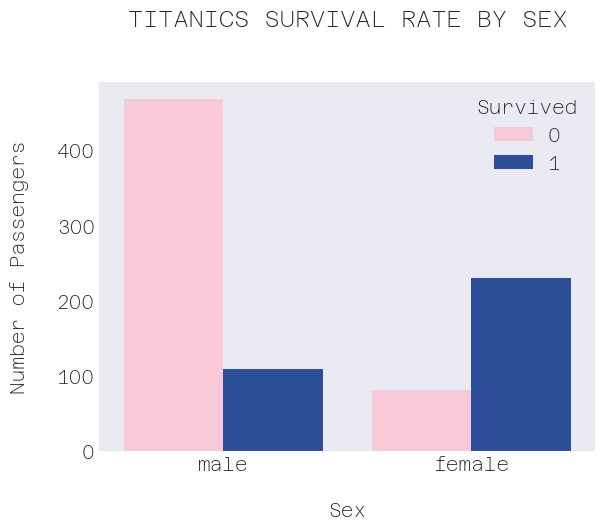

In [290]:
# Survival rate by Gender
sns.countplot(x=X_train["Sex"], hue= X_train[ "Survived"], palette={0: "#ffc1d6", 1: "#1b48ab"})
plt.xlabel("Sex", labelpad=20)
plt.ylabel("Number of Passengers", labelpad=20)
plt.title("TITANICS SURVIVAL RATE BY SEX", pad=40, fontweight='bold')
plt.show()

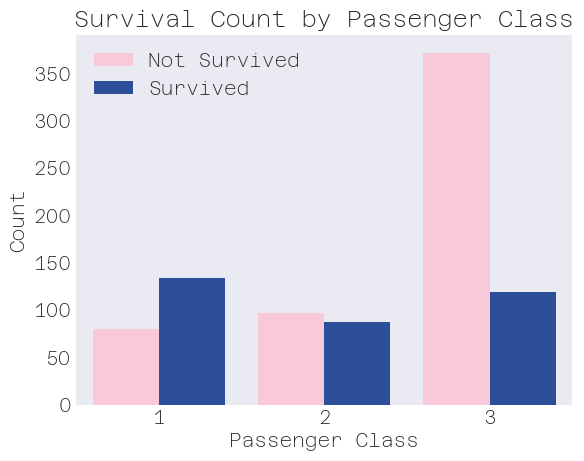

In [291]:
# Survival rate by Class
# Is the certain class more likely to survive than others?

sns.countplot(x="Pclass", hue="Survived", data=data_train, palette={0: "#ffc1d6", 1: "#1b48ab"})

plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(["Not Survived", "Survived"])
plt.show()

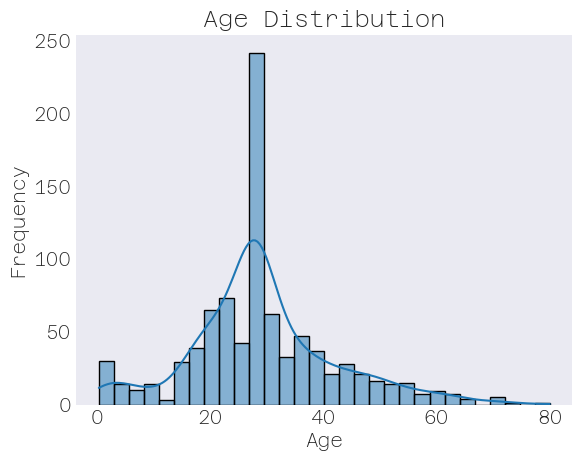

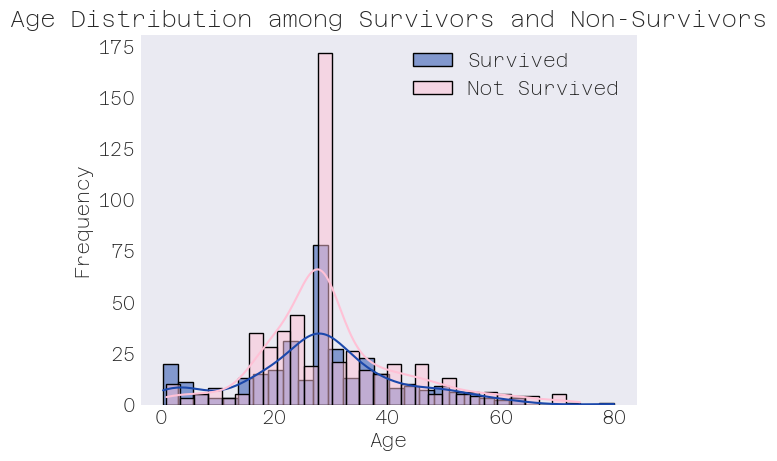

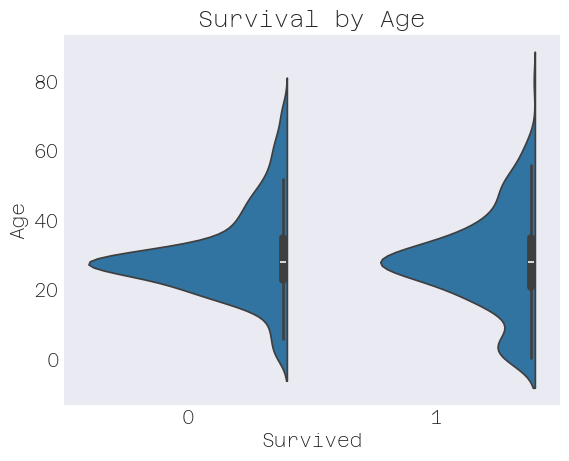

In [292]:
# Age Distribution
# Distribution plot of ages
sns.histplot(X_train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Filter data for survivors and non-survivors
survived_data = X_train[X_train['Survived'] == 1]['Age'].dropna()
not_survived_data = X_train[X_train['Survived'] == 0]['Age'].dropna()

# Create distribution plots for survivors and non-survivors
sns.histplot(survived_data, bins=30, kde=True, color='#1b48ab', label='Survived')
sns.histplot(not_survived_data, bins=30, kde=True, color='#ffc1d6', label='Not Survived')

# Add labels and title
plt.title('Age Distribution among Survivors and Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show plot
plt.show()


# Survival rate by age
# Violin plot of age by survival
sns.violinplot(x='Survived', y='Age', data=X_train, split=True)
plt.title('Survival by Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

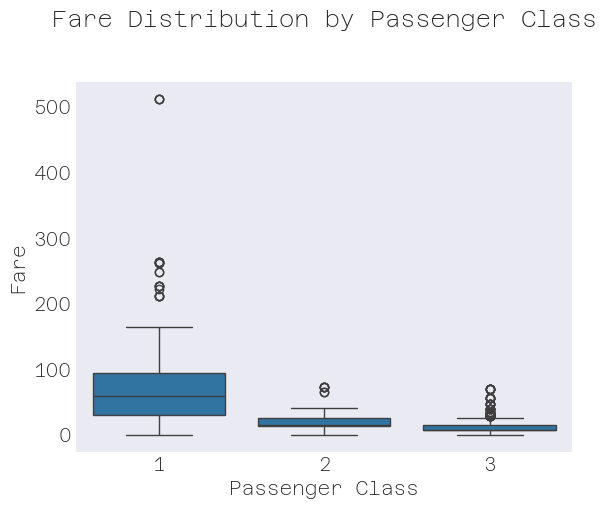

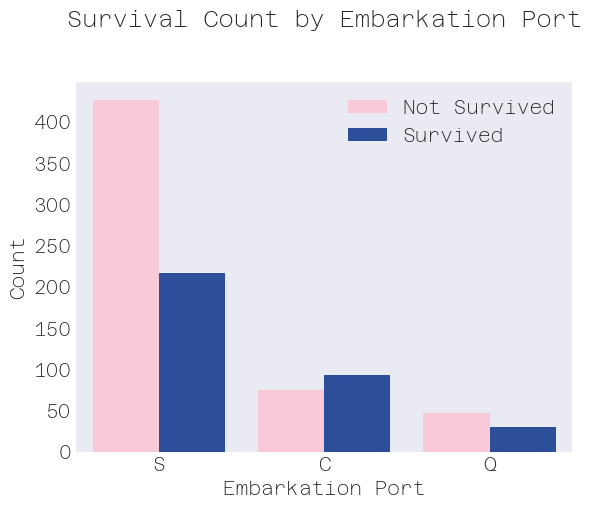

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


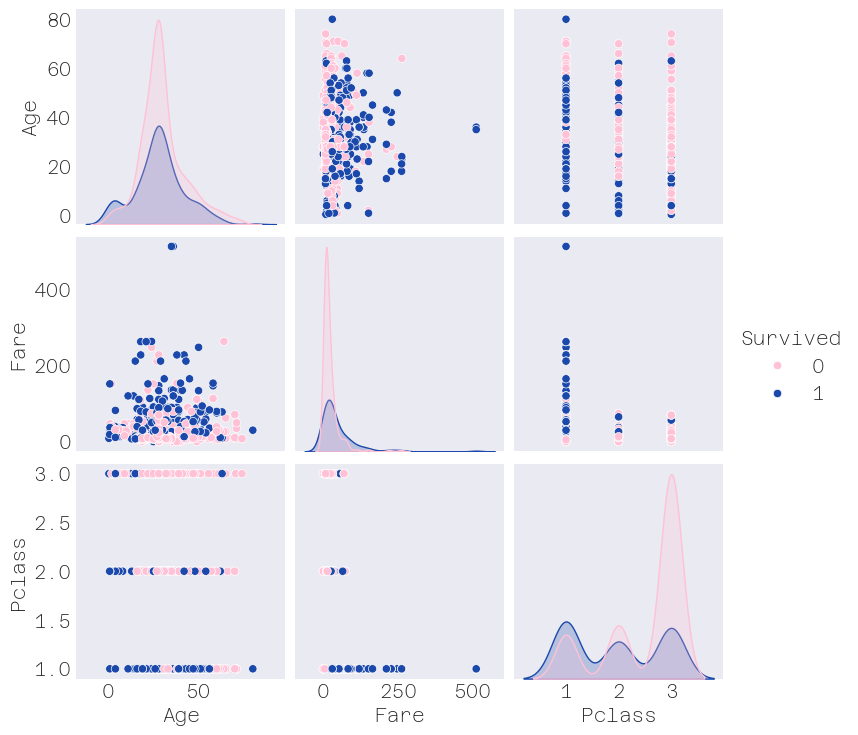

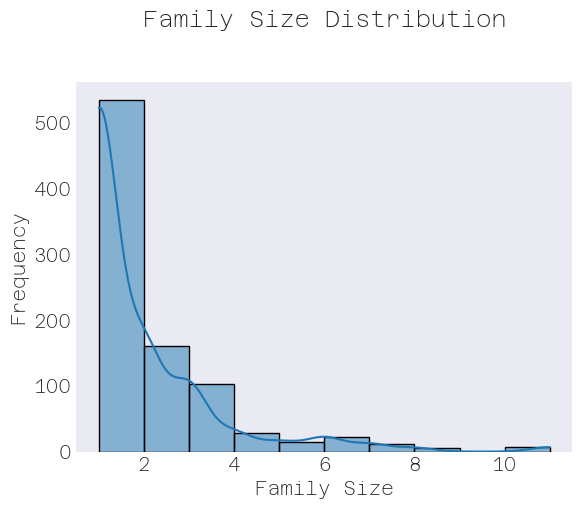

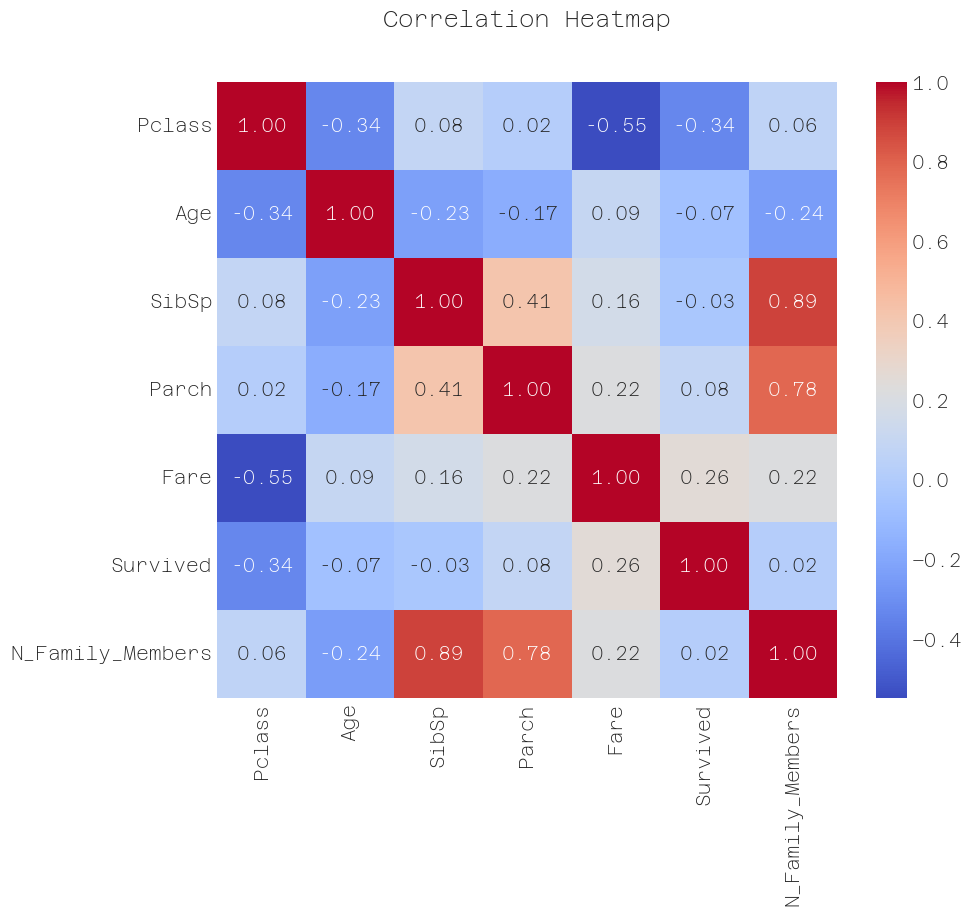

In [293]:
# Fare distribution by Class
# Box plot of fare by passenger class
sns.boxplot(x='Pclass', y='Fare', data=X_train)
plt.title('Fare Distribution by Passenger Class', pad=40)
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

# Survival Rate by Embarkation Port
# Count plot of survival by embarkation port
sns.countplot(x='Embarked', hue='Survived', data=X_train, palette={0: "#ffc1d6", 1: "#1b48ab"})
plt.title('Survival Count by Embarkation Port', pad=40)
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


# Pairplot of Features
# Pairplot of selected features
sns.pairplot(X_train[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette={0: "#ffc1d6", 1: "#1b48ab"})
plt.show()


# Family Size Distribution
# Create a new feature for family size
X_train['Family_Size'] = X_train['SibSp'] + X_train['Parch'] + 1

# Histogram of family size
sns.histplot(X_train['Family_Size'], bins=10, kde=True)
plt.title('Family Size Distribution', pad=40)
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

# remove "Family_Size"
X_train = X_train.loc[:, X_train.columns!="Family_Size"]


# Correlation Heatmap

# Drop non-numeric columns
numeric_columns = X_train.select_dtypes(include=['number']).columns
X_train_numeric = X_train[numeric_columns]

# Calculate correlation matrix
correlation_matrix = X_train_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', pad=40)
plt.show()




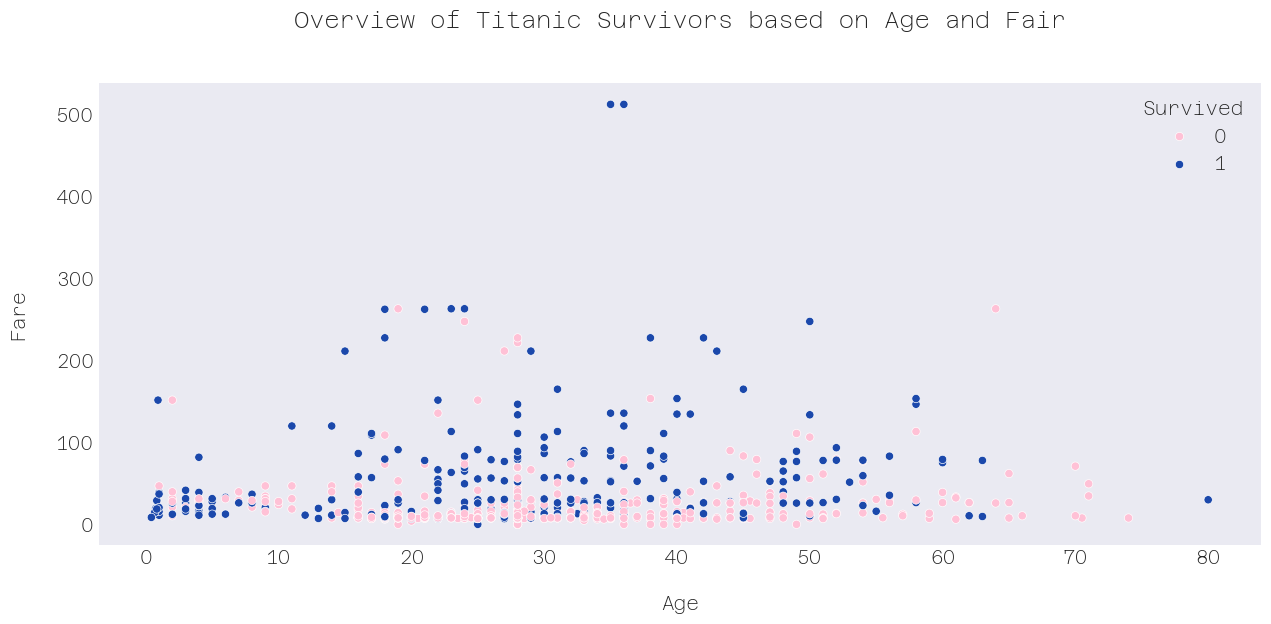

In [294]:
plt.figure(figsize=(15, 6))

# plot overview based on age and fair
sns.scatterplot(y=data_train["Fare"], x=data_train["Age"], hue=data_train["Survived"], palette={0: "#ffc1d6", 1: "#1b48ab"})

plt.xlabel("Age", labelpad=20)
plt.ylabel("Fare", labelpad=20)
plt.title("Overview of Titanic Survivors based on Age and Fair", pad=40)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use st

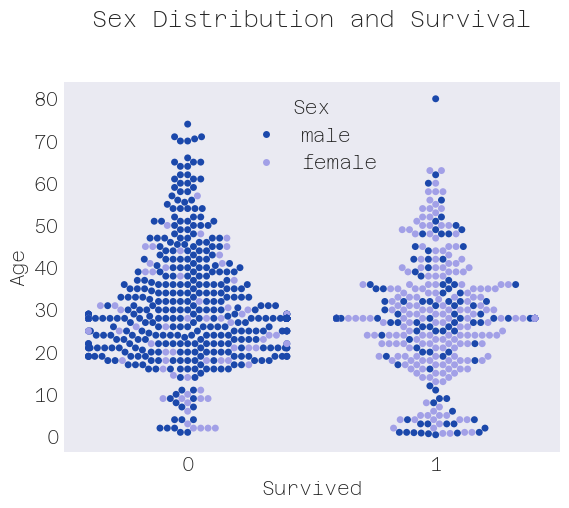

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


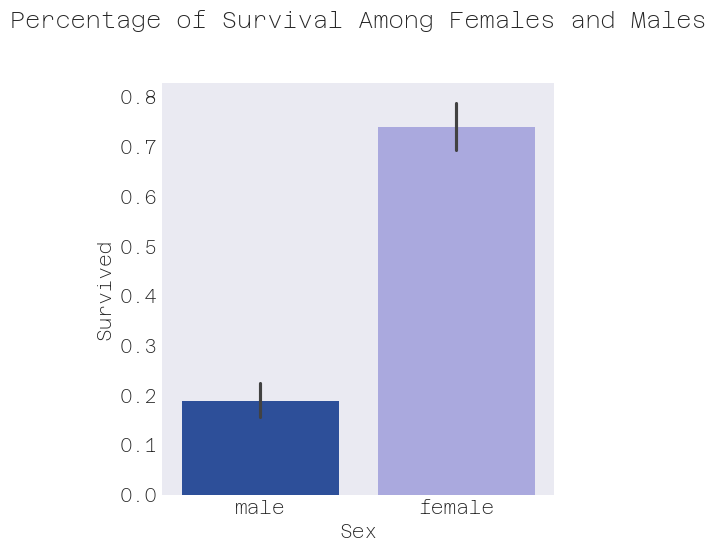

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use st

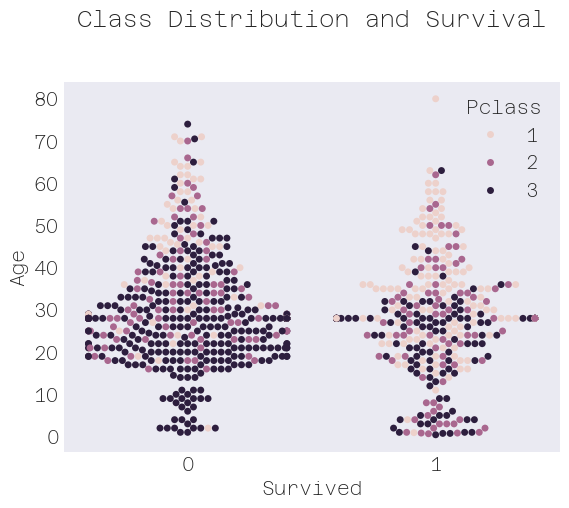

In [295]:
# with the swarm plot we can potentially see some clusters in the data
sns.swarmplot(x="Survived", y= "Age", hue="Sex", data=data_train, palette={"female": "#a2a0e7", "male": "#1b48ab"})
plt.title("Sex Distribution and Survival", pad=40)
plt.show()

sns.catplot(x = "Sex",y = "Survived",hue = "Sex", kind = "bar", data = data_train,
palette={"female": "#a2a0e7", "male": "#1b48ab", })
# Breakdown by gender within Survived category, )
plt.title("Percentage of Survival Among Females and Males", pad=40)
plt.show()

# class distribition and survival
sns.swarmplot(x="Survived", y= "Age", hue="Pclass", data=data_train)
plt.title("Class Distribution and Survival", pad=40)
plt.show()





## 1.4 Data Encoding

Next, I will move on by encoding the categorical variables. Before follow with the enconding, it is good to check if the data is consistent.

In [296]:
# check if data is consistent for all columns with object type - what will be enconded
print(X_train.info())
print(f"\n\n{X_train.Sex.value_counts()}")



<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            889 non-null    int64  
 1   Sex               889 non-null    object 
 2   Age               889 non-null    float64
 3   SibSp             889 non-null    int64  
 4   Parch             889 non-null    int64  
 5   Fare              889 non-null    float64
 6   Embarked          889 non-null    object 
 7   Survived          889 non-null    int64  
 8   N_Family_Members  889 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB
None


Sex
male      577
female    312
Name: count, dtype: int64


In [297]:
print(X_train.Embarked.value_counts())



Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


## 1.5 *Machine Learning Models* 

In [299]:
from sklearn.model_selection import train_test_split, GridSearchCV
# evaluation metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score 
from sklearn.pipeline import make_pipeline

y_train = X_train["Survived"]
X_train_selected = X_train.drop(["Survived", "SibSp", "Parch"], axis=1)
X_test_selected = X_test.drop(["SibSp", "Parch"], axis=1)


# encoded
X_train_encoded = pd.get_dummies(X_train_selected)
X_test_encoded = pd.get_dummies(X_test_selected)

# create test & validation+train
X_trainval_model,  X_test_model, y_trainval_model, y_test_model = train_test_split(X_train_encoded, y_train, test_size=0.2, random_state=25)

# create validation and train sets
X_train_model, X_validation, y_train_model, y_validation = train_test_split(X_trainval_model, y_trainval_model, random_state=25)

print(f"Test Set Size: {X_test_model.shape}")
print(f"Train Set Size: {X_train_model.shape}")
print(f"Validation Set Size: {X_validation.shape}")

all_models = []



X_train_model.info()



Test Set Size: (178, 9)
Train Set Size: (533, 9)
Validation Set Size: (178, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 72 to 4
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            533 non-null    int64  
 1   Age               533 non-null    float64
 2   Fare              533 non-null    float64
 3   N_Family_Members  533 non-null    int64  
 4   Sex_female        533 non-null    bool   
 5   Sex_male          533 non-null    bool   
 6   Embarked_C        533 non-null    bool   
 7   Embarked_Q        533 non-null    bool   
 8   Embarked_S        533 non-null    bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 23.4 KB


In [197]:
# Random Forest Classifier with Grid Search

# define parameter grid
parameter_grid = {
    "randomforestclassifier__n_estimators": [50, 100, 200, 300, 400, 500], # this is the number of trees
    "randomforestclassifier__max_depth": [None, 5, 10, 20, 30, 40, 50],
    "randomforestclassifier__min_samples_split": [2, 5, 10],
    "randomforestclassifier__min_samples_leaf": [1, 2, 4],
    "randomforestclassifier__max_features": ["auto", "sqtr", "log2"],
    "randomforestclassifier__bootstrap": [True, False]

}

# initialise the random forest
# m_forest = RandomForestClassifier(random_state=25)

pipe = make_pipeline(RandomForestClassifier(random_state=25))

grid_random_forest = GridSearchCV(pipe, parameter_grid, cv=5)

grid_random_forest.fit(X_train_model, y_train_model)

# Make predictions and get probabilities
y_pred = grid_random_forest.predict(X_test_model)
y_proba = grid_random_forest.predict_proba(X_test_model)[:, 1]  # Probability of survived class

# Calculate AUC score
auc = roc_auc_score(y_test_model, y_proba)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test_model, y_pred)
precision = precision_score(y_test_model, y_pred)
recall = recall_score(y_test_model, y_pred)

# save results
model_results = {"model": "Random Forest",
                    "parameters":grid_random_forest.best_params_,
                    "best cv score": grid_random_forest.best_score_,
                    "validation score": grid_random_forest.score(X_validation, y_validation),
                    "test score": grid_random_forest.score(X_test_model, y_test_model),
                    "AUC": auc,
                    "Accuracy": accuracy,
                    "Precision": precision,
                    "Recall": recall }

all_models.append(model_results)

# print results
for key, value in model_results.items():
    print(f"{key} : {value}")


model : Random Forest
parameters : {'randomforestclassifier__bootstrap': False, 'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 50}
best cv score : 0.8443837065773232
validation score : 0.8033707865168539
test score : 0.7808988764044944
AUC : 0.8272486772486773
Accuracy : 0.7808988764044944
Precision : 0.7313432835820896
Recall : 0.7


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
7560 fits failed out of a total of 11340.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3780 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versio

In [332]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold

# we create a simple pipe, with two steps, one for pre-processing, one for classifier
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingClassifier())])

parameter_grid = [
{"classifier": [GradientBoostingClassifier()], # this is the first classifier
"preprocessing":[StandardScaler(), None],
'classifier__n_estimators': [100, 200, 300], #number of trees
'classifier__learning_rate': [0.001,0.005,0.01],
'classifier__max_depth': [5, 8,10],
'classifier__min_samples_split': [2, 5, 10],
'classifier__min_samples_leaf': [4, 6, 8],
'classifier__subsample': [0.2,0.5, 0.8],
"classifier__max_features": ['auto', 'sqrt', 'log2', None] }

]


#learning_rate=0.005, max_depth=8,
#                            max_features='sqrt', min_samples_leaf=4,
#                            n_estimators=200, subsample=0.5

#(learning_rate=0.01, max_depth=5, min_samples_leaf=2,
#                           min_samples_split=5, subsample=0.9)

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_gbc = GridSearchCV(pipe, parameter_grid, cv=stratified_cv, n_jobs=-1)
grid_gbc.fit(X_train_model, y_train_model)



# Make predictions and get probabilities
y_pred = grid_gbc.predict(X_test_model)
y_proba = grid_gbc.predict_proba(X_test_model)[:, 1]  # Probability of survived class

# Calculate AUC score
auc = roc_auc_score(y_test_model, y_proba)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test_model, y_pred)
precision = precision_score(y_test_model, y_pred)
recall = recall_score(y_test_model, y_pred)

# save results
model_results = {"model": "Gradient Boosting Classifier",
                    "parameters":grid_gbc.best_params_,
                    "best cv score": grid_gbc.best_score_,
                    "validation score": grid_gbc.score(X_validation, y_validation),
                    "test score": grid_gbc.score(X_test_model, y_test_model),
                    "AUC": auc,
                    "Accuracy": accuracy,
                    "Precision": precision,
                    "Recall": recall }

all_models.append(model_results)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
7290 fits failed out of a total of 29160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5325 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versio

In [314]:
# SVC model
from sklearn.svm import SVC

pipeline = Pipeline(
    [
        ("scaler", StandardScaler()), # step 01: scale the data
        ("svc", SVC(probability=True)) # apply svc
    ]
)

parameter_grid = {
    'svc__C': [0.01, 1, 100],        # Range of C values
    'svc__gamma': [0.01 , 1, 100], # Range of gamma values
    'svc__kernel': ["linear", "rgb"],    # Different kernels
    "svc__degree": [2, 3] # for the poly variation
}

grid_svc = GridSearchCV(pipeline, parameter_grid, cv=5, scoring='accuracy', n_jobs=-3)
grid_svc.fit(X_train_model, y_train_model)

# Make predictions and get probabilities
y_pred = grid_svc.predict(X_test_model)
y_proba = grid_svc.predict_proba(X_test_model)[:, 1]  # Probability of survived class

# Calculate AUC score
auc = roc_auc_score(y_test_model, y_proba)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test_model, y_pred)
precision = precision_score(y_test_model, y_pred)
recall = recall_score(y_test_model, y_pred)

# save results
model_results = {"model": "Support Vector Machine",
                    "parameters":grid_svc.best_params_,
                    "best cv score": grid_svc.best_score_,
                    "validation score": grid_svc.score(X_validation, y_validation),
                    "test score": grid_svc.score(X_test_model, y_test_model),
                    "AUC": auc,
                    "Accuracy": accuracy,
                    "Precision": precision,
                    "Recall": recall }

all_models.append(model_results)

# print results
for key, value in model_results.items():
    print(f"{key} : {value}")

KeyboardInterrupt: 

In [337]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

#pipe = make_pipeline(("scaler", StandardScaler()), #placeholder for the scaler
#("logisticregression", LogisticRegression(max_iter=1000)))

pipe = Pipeline([
    ('scaler', StandardScaler()),  # Name the step 'scaler'
    ('logisticregression', LogisticRegression(max_iter=1000))  # Name the step 'logisticregression'
])

# for the parameter grid it is important to use the name given by 'make_pipeline'
# you can see this with the function steps

parameter_grid = {
    "scaler": [StandardScaler(), MinMaxScaler()],
    "logisticregression__C": [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'logisticregression__solver': ['liblinear', 'saga', 'lbfgs'],  # note: 'lbfgs' and 'liblinear' do not support 'elasticnet'
    'logisticregression__max_iter': [100, 200, 500],
    'logisticregression__fit_intercept': [True, False],
    'logisticregression__class_weight': [None, 'balanced']
    }

grid_logreg = GridSearchCV(pipe, parameter_grid, cv=5)

grid_logreg.fit(X_train_model, y_train_model)


# Make predictions and get probabilities
y_pred = grid_logreg.predict(X_test_model)
y_proba = grid_logreg.predict_proba(X_test_model)[:, 1]  # Probability of survived class

# Calculate AUC score
auc = roc_auc_score(y_test_model, y_proba)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test_model, y_pred)
precision = precision_score(y_test_model, y_pred)
recall = recall_score(y_test_model, y_pred)

# save results
model_results = {"model": "Logistic Regression",
                    "parameters":grid_logreg.best_params_,
                    "best cv score": grid_logreg.best_score_,
                    "validation score": grid_logreg.score(X_validation, y_validation),
                    "test score": grid_logreg.score(X_test_model, y_test_model),
                    "AUC": auc,
                    "Accuracy": accuracy,
                    "Precision": precision,
                    "Recall": recall }

all_models.append(model_results)

# print results
for key, value in model_results.items():
    print(f"{key} : {value}")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Library/Frameworks/Python.frame

model : Logistic Regression
parameters : {'logisticregression__C': 1, 'logisticregression__class_weight': None, 'logisticregression__fit_intercept': False, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear', 'scaler': MinMaxScaler()}
best cv score : 0.8143184623523189
validation score : 0.7584269662921348
test score : 0.7471910112359551
AUC : 0.8232804232804232
Accuracy : 0.7471910112359551
Precision : 0.6811594202898551
Recall : 0.6714285714285714


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.81058014 0.62475754 0.62475754 ... 0.79934756 0.79368718 0.79934756]
  warnings.warn(


Further exploration and questions

- Does the features I created helped the model?


In [249]:
for model in all_models:
    for i in model:
        if i=="model":
            print (model[i])
        if i != "parameters" and i!="model":
            print(f"{i} : {model[i]:.3f}")

    print("==="*30)

Random Forest
best cv score : 0.844
validation score : 0.803
test score : 0.781
AUC : 0.827
Accuracy : 0.781
Precision : 0.731
Recall : 0.700
Gradient Boosting Classifier
best cv score : 0.848
validation score : 0.843
test score : 0.792
AUC : 0.837
Accuracy : 0.792
Precision : 0.780
Recall : 0.657
Support Vector Machine
best cv score : 0.660
validation score : 0.742
test score : 0.736
AUC : 0.813
Accuracy : 0.736
Precision : 0.926
Recall : 0.357
Support Vector Machine
best cv score : 0.816
validation score : 0.770
test score : 0.764
AUC : 0.781
Accuracy : 0.764
Precision : 0.712
Recall : 0.671
Logistic Regression
best cv score : 0.809
validation score : 0.781
test score : 0.753
AUC : 0.826
Accuracy : 0.753
Precision : 0.691
Recall : 0.671


In [242]:
all_models = [all_models[i] for i in [0,1,2,4]]

Now that I found the best parameters for several models, I will move one and check other measures of sucess, in order to decide which model to use in the end.


In [ ]:
from sklearn.ensemble import VotingClassifier

# Define voting scheme (hard or soft)
voting = 'hard'  # Replace with 'soft' for soft voting

# Create the VotingClassifier
ensemble = VotingClassifier(estimators=[('Forest', grid_random_forest), ('LogReg', grid_logreg), ("GBC", grid_gbc)], voting=voting)
ensemble.fit(X_train_model, y_train_model)

print(ensemble.best_params_)

In [341]:
predictions = grid_logreg.predict(X_test_encoded)


output = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions})
output.to_csv('submission_grid_logreg2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [339]:
print(grid_logreg.best_params_)

{'logisticregression__C': 1, 'logisticregression__class_weight': None, 'logisticregression__fit_intercept': False, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear', 'scaler': MinMaxScaler()}


In [310]:
X_test = pd.concat([X_test, data_test["PassengerId"]], axis=1)



In [305]:
X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            418 non-null    int64  
 1   Age               418 non-null    float64
 2   Fare              418 non-null    float64
 3   N_Family_Members  418 non-null    int64  
 4   Sex_female        418 non-null    bool   
 5   Sex_male          418 non-null    bool   
 6   Embarked_C        418 non-null    bool   
 7   Embarked_Q        418 non-null    bool   
 8   Embarked_S        418 non-null    bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 15.2 KB


In [329]:
grid_gbc.best_params_

{'classifier': GradientBoostingClassifier(learning_rate=0.005, max_depth=8,
                            max_features='sqrt', min_samples_leaf=4,
                            n_estimators=200, subsample=0.5),
 'classifier__learning_rate': 0.005,
 'classifier__max_depth': 8,
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_leaf': 4,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 200,
 'classifier__subsample': 0.5,
 'preprocessing': None}

In [333]:
all_models[-1]

{'model': 'Gradient Boosting Classifier',
 'parameters': {'classifier': GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features='sqrt',
                             min_samples_leaf=4, min_samples_split=5,
                             n_estimators=200, subsample=0.5),
  'classifier__learning_rate': 0.01,
  'classifier__max_depth': 5,
  'classifier__max_features': 'sqrt',
  'classifier__min_samples_leaf': 4,
  'classifier__min_samples_split': 5,
  'classifier__n_estimators': 200,
  'classifier__subsample': 0.5,
  'preprocessing': None},
 'best cv score': 0.8387056956445071,
 'validation score': 0.8258426966292135,
 'test score': 0.7808988764044944,
 'AUC': 0.8196428571428571,
 'Accuracy': 0.7808988764044944,
 'Precision': 0.7384615384615385,
 'Recall': 0.6857142857142857}